<a href="https://colab.research.google.com/github/stanley1208/AI-Learning/blob/main/week4_day11_first_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt



In [2]:
x=torch.linspace(0,10,50).unsqueeze(1)
y=2*x+1+torch.randn(50,1)*0.5


In [4]:
# One layer, same as y = m*x + b
model=nn.Linear(1,1)

# Mean Squared Error loss
criterion=nn.MSELoss()

# Gradient Descent optimizer
optimizer=optim.SGD(model.parameters(),lr=0.01)

In [8]:
epochs=200
losses=[]

for epoch in range(epochs):
  y_pred=model(x)
  loss=criterion(y_pred,y)
  losses.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print("Learned weight & bias:",list(model.parameters()))

Learned weight & bias: [Parameter containing:
tensor([[1.9899]], requires_grad=True), Parameter containing:
tensor([0.9683], requires_grad=True)]


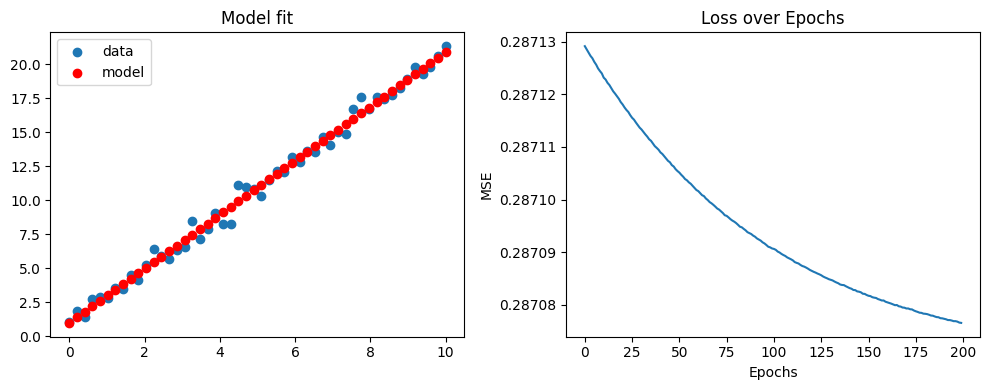

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(x.detach(),y.detach(),label='data')
plt.scatter(x.detach(),model(x).detach(),color='red',label='model')
plt.legend()
plt.title("Model fit")

plt.subplot(1,2,2)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.tight_layout()
plt.show()
